# VISUALIZAÇÃO DE EMISSÃO DE OH

## Importando Dependências

In [7]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
from PIL import Image
from scipy import ndimage
from scipy.ndimage import gaussian_filter as gf
import os
import seaborn as sns
from skimage.draw import polygon
from skimage import filters
sns.set_style("darkgrid")
sns.set_palette('magma',11)
sns.color_palette('magma',11)

[(0.060949, 0.044794, 0.176129),
 (0.171713, 0.067305, 0.370771),
 (0.316654, 0.07169, 0.48538),
 (0.445163, 0.122724, 0.506901),
 (0.57549, 0.16953, 0.503466),
 (0.716387, 0.214982, 0.47529),
 (0.846416, 0.272473, 0.421631),
 (0.944006, 0.377643, 0.365136),
 (0.9867, 0.535582, 0.38221),
 (0.997077, 0.690088, 0.471811),
 (0.994524, 0.841387, 0.598983)]

## Especificando o Frame Zero

Imagens de emissão são obtidas antes mesmo do estabelecimento do escoamento livre na seção de testes, ou combustor. Isso devido ao gatilho usado para sincronismo da câmera, localizado no tubo de choque, e portanto, cronologicamente anterior ao fenômeno sob estudo. 

Sabemos que:

1. o intervalo entre o gatilho utilizado (sinal p2) e a 'subida' do primeiro sensor da seção de testes é de 1140 $\mu s$;
2. a câmera tem sido operada a uma frequência de aquisição de 10kHz, correspondendo a uma imagem a cada 100 $\mu s$;
3. nessa série de experimentos, foram salvas em .tif as imagens do quadro -5 ao quadro 50, logo, a imagem 1 na verdade é a imagem -5.

Então, quantas imagens ocorreram em 1140 $\mu s$? Ocorreram 'a parte inteira na razão 1140/100' imagens, ou 11 imagens. 

In [8]:
Delta_t = 440 + 700 #us - 440us entre p2(trigger) e p5  +  700 entre p5 e subida de S1. 
n_imagens = Delta_t/100 + 5
n_imagens = np.floor(n_imagens).astype('int8') #procedimento para tornar n_imagens um número inteiro, já que não há frame 1,7.
print(n_imagens)

16


## Identificando Número Total de Experimentos da Pasta 'Exp'
Todas as imagens tiff devem entar dentro da pasta 'Exp'.

In [9]:
exps_t= os.listdir( './Exp' )
exps_t= np.array([ int(x[3:5]) for x in exps_t if x[3] != '_'])
exps_t= np.sort( exps_t )
print(f'Temos uma lista de {exps_t.size} experimentos, que são os experimentos de número\n', exps_t)

Temos uma lista de 62 experimentos, que são os experimentos de número
 [ 1  2  3  4  6  7 10 12 13 14 15 17 18 19 20 21 22 23 24 25 26 27 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 50 51 53 54 55 56
 57 58 59 60 61 63 65 67 68 69 70 71 72 73]


## Listando Experimentos Com Injeção de H2
Aqui, listamos os experimentos realizados sob injeção de H2 bem como suas respectivas razões de equivalência $\phi$.

In [10]:
exps_H2 = np.array([13, 14, 15, 23, 24, 25, 26, 27, 29, 30, 31, 32, 34, 35, 36, 48, 63, 65, 67, 68, 69, 70, 71, 72])

phi_H2  = np.array([0.16, 0.14, 0.11, 0.11, 0.1 , 0.12, 0.1 , 0.15, 0.14, 0.16,
                    0.21, 0.23, 0.22, 0.2 , 0.12, 0.28, 0.47, 0.41, 0.45, 0.45,
                    0.43, 0.47, 0.41, 0.47, 0.49])

## Imagens TIFF contidas em cada pasta do experimento 'x'.
Aqui, criamos uma função para buscar todos os arquivos dentro da pasta 'x', em que 'x' é o número do experimento de interesse. Obs: note que o código procura por imagens do formato tif. 

In [11]:
def Arqs(X):
    arqs = os.listdir( './Exp/Exp'+str(X) )
    arqs = [x for x in arqs if x.endswith("tif")]
    arqs.sort()
    return arqs

In [12]:
#Exemplo de Uso 
x = 48 #Experimento 48
print(Arqs(x))

['Exp_001.tif', 'Exp_002.tif', 'Exp_003.tif', 'Exp_004.tif', 'Exp_005.tif', 'Exp_006.tif', 'Exp_007.tif', 'Exp_008.tif', 'Exp_009.tif', 'Exp_010.tif', 'Exp_011.tif', 'Exp_012.tif', 'Exp_013.tif', 'Exp_014.tif', 'Exp_015.tif', 'Exp_016.tif', 'Exp_017.tif', 'Exp_018.tif', 'Exp_019.tif', 'Exp_020.tif', 'Exp_021.tif', 'Exp_022.tif', 'Exp_023.tif', 'Exp_024.tif', 'Exp_025.tif', 'Exp_026.tif', 'Exp_027.tif', 'Exp_028.tif', 'Exp_029.tif', 'Exp_030.tif', 'Exp_031.tif', 'Exp_032.tif', 'Exp_033.tif', 'Exp_034.tif', 'Exp_035.tif', 'Exp_036.tif', 'Exp_037.tif', 'Exp_038.tif', 'Exp_039.tif', 'Exp_040.tif', 'Exp_041.tif', 'Exp_042.tif', 'Exp_043.tif', 'Exp_044.tif', 'Exp_045.tif', 'Exp_046.tif', 'Exp_047.tif', 'Exp_048.tif', 'Exp_049.tif', 'Exp_050.tif', 'Exp_051.tif', 'Exp_052.tif', 'Exp_053.tif', 'Exp_054.tif', 'Exp_055.tif', 'Exp_056.tif']


# INTENSIDADE ACUMULADA: 
## Visualizando a Soma de Intensidade de Emissão de OH de acordo com Quadros e  Eixo definidos.  
Definindo a lista de quadros que nos interessa, bem como o eixo a que queremos somar as intensidades:

- eixo=0 representa uma soma ao longo da direção vertical, mantendo a a dimensão horizontal (x) da imagem.
- eixo=1 representa uma soma ao longo da direção horizontal, mantendo a a dimensão vertical (y) da imagem.

In [13]:
quadros = np.arange( n_imagens, n_imagens+10 +1 ) #Vamos nos limitar a 1ms de imagens``
eixo = 1

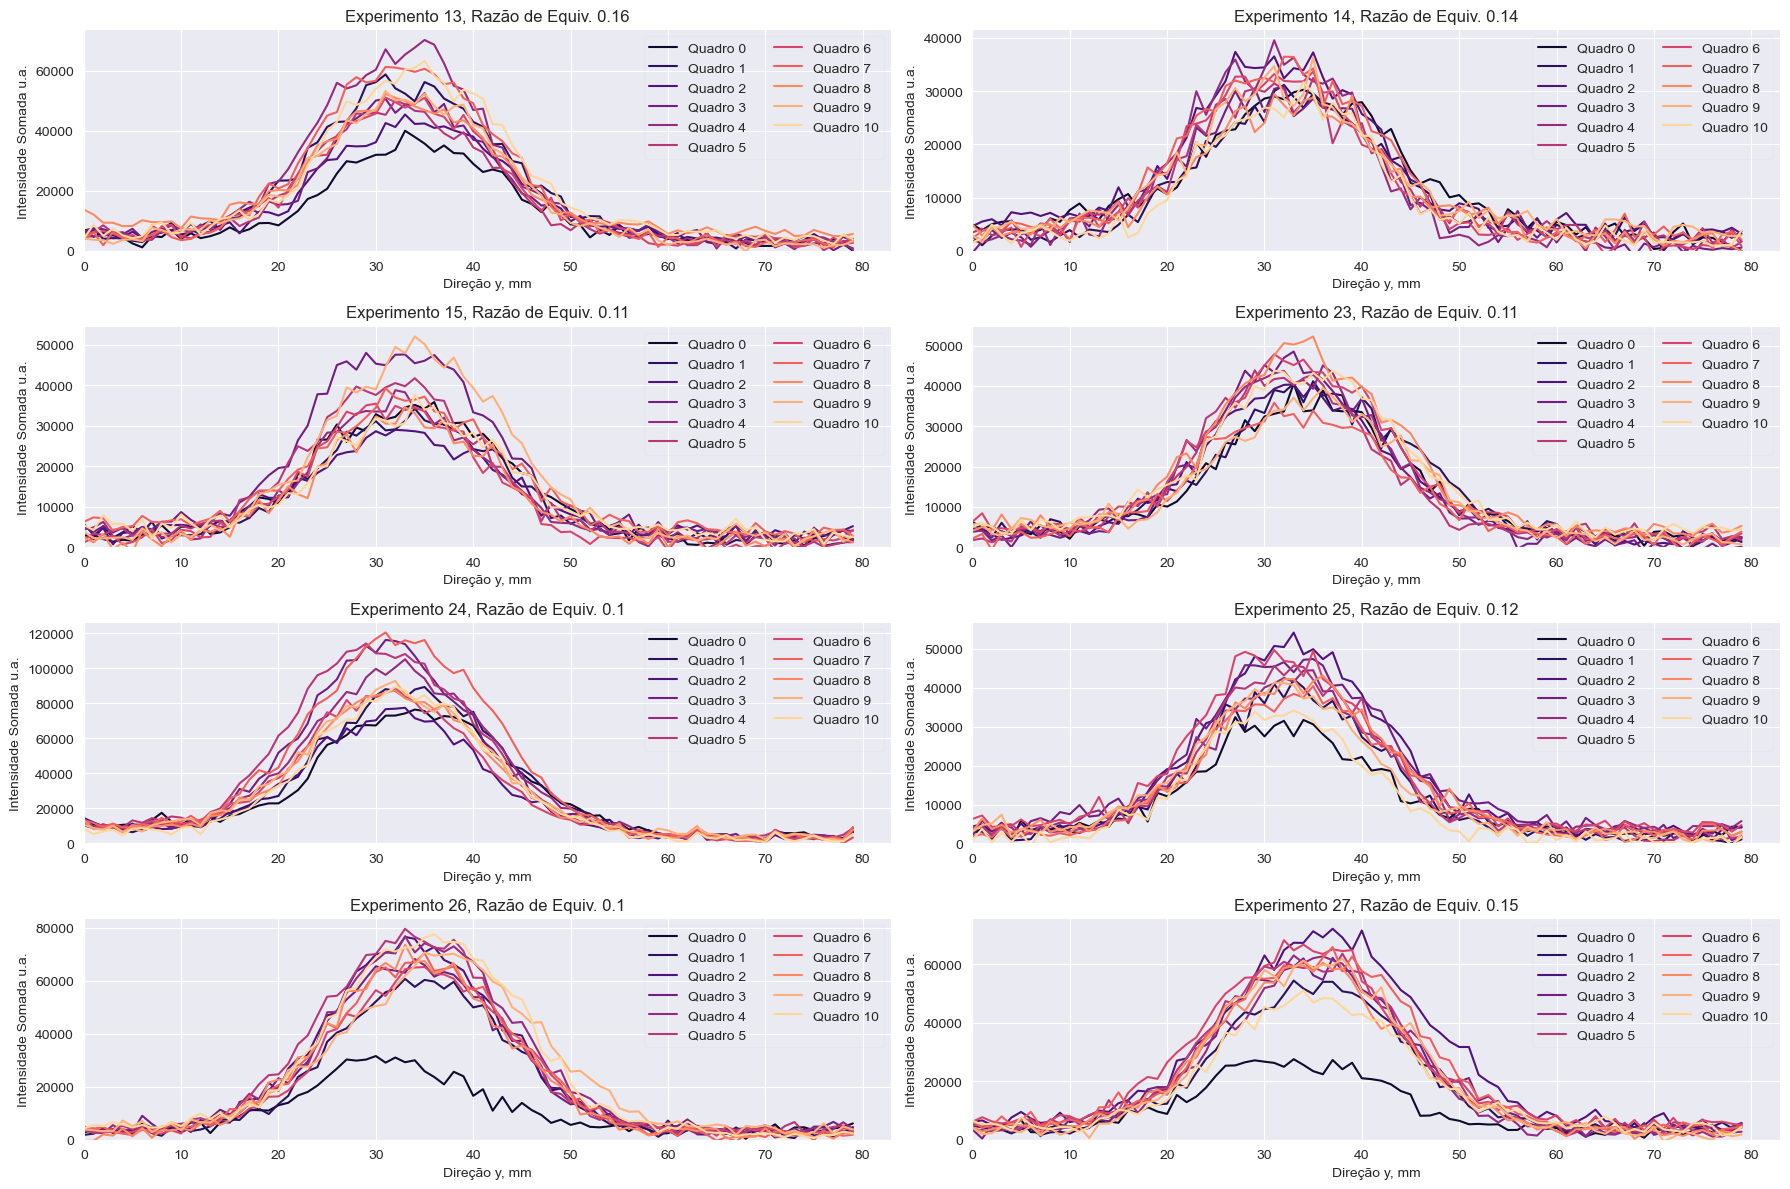

In [14]:
plt.figure(figsize=(18,12))
for i,x in enumerate(exps_H2[0:8]):
    plt.subplot(4,2,i+1)

    for q in quadros:
        nome = './Exp/Exp' + str(x) + '/Exp_0'+str(q)+'.tif'
        try:
            
            I = np.array(Image.open(nome))
            I0 = I[500:,:].mean()
            I = (I - I0)[200:280,120:470]


            plt.title(f'Experimento {x}, Razão de Equiv. {phi_H2[i]}')
            plt.plot(  I.sum( axis = eixo), label=f'Quadro {q-n_imagens}'  )
            
            plt.ylabel('Intensidade Somada u.a.')
            direcao = ['x','y']
            plt.xlabel(f'Direção {direcao[eixo]}, mm')
            #plt.xlim(0, None)
            #plt.ylim(0, 40000) #Intensidade Máxima
                    
  
        except:
            print(f'Experimento {x} não tem frame {q}')
    plt.xlim(0,None)
    plt.ylim(0,None)
    ncol = 4 - 2*eixo
    plt.legend(ncol=ncol,framealpha=0.1)
    plt.tight_layout()

#Para salvar a figura, descomente o comando abaixo:    
plt.savefig('Acumulada2.png')

# MAPA DE INTENSIDADE

## Importando Imagem de Referência
Uma imagem de referência deverá estar localizada numa pasta chamada 'Ref' e o a referência deverá se chamar 'Ref.tif'

In [15]:
nome = './Ref/Ref.tif'
try:        
    Ref = np.array(Image.open(nome))
except:
    print(f'Arquivo {nome} não encontrado.')

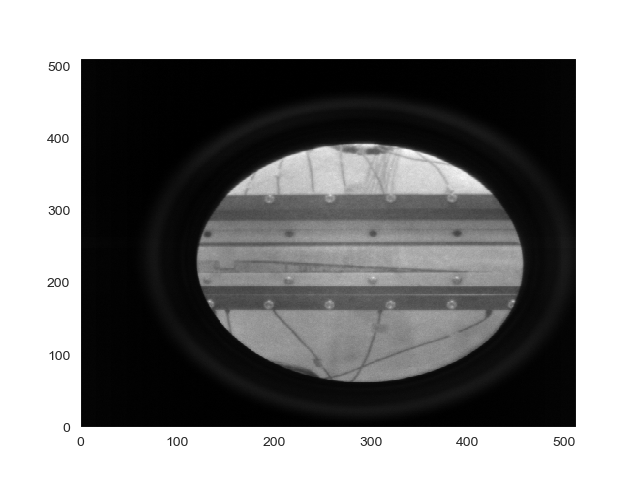

In [16]:
%matplotlib widget
plt.figure()
plt.pcolormesh(Ref,cmap='gray')

##### Identificando a câmara de combustão.
Agora, nos vamos identificar o polígono que representa a câmara de combustão, mas primeiro, precisamos definir os vértices desse poílogo. A imagem acima serve para no auxiliar na identificação desses pontos, batando direcionar o "mouse" sobre cada "vértice" deesse polígono hipotético. 
Por exemplo, da imagem acima identificamos os seuintes pontos em sentido horário:
- [124,250], vértice superior esquerdo,
- [454,250], vértice superior direito,
- [454,216], vértice inferior direito,
- [400,216], vértice em que a rampa do combustor deixa de ser visível,
- [190,230], vértice representando início da rampa,
- [160,230], vértice 1 da cavidade,
- [160,220], vértice 2 da cavidade,
- [140,220], vértice 3 da cavidade,
- [140,230], vértice 4 da cavidade,
- [124,230], vértice inferior esquerdo do combustor e
- [124,250], repetindo o primeiro vértice para fechar o polígono.

Podemos definir aqui a posição de injeção também: \
p_inj = [130,230]

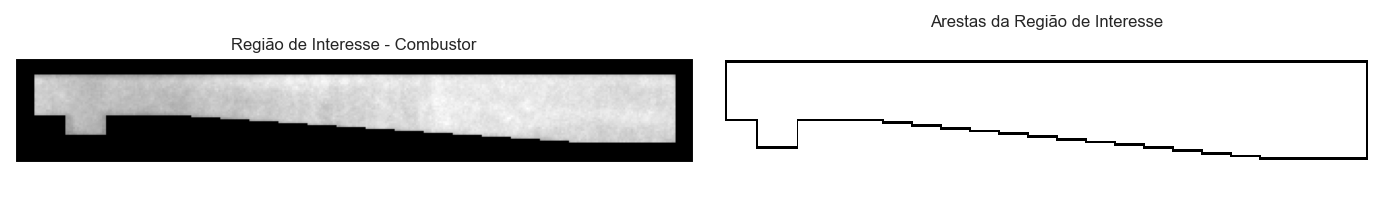

In [17]:
plt.figure(figsize=(14,2))

#Listando os vértices acima:
v = np.array( ((124,250),(454,250),(454,216),(400,216),(190,230),(160,230),(160,220),(140,220),(140,230),(124,230),(124,250)) )
p_inj = (130,230)

rr, cc = polygon(v[:,0], v[:,1], Ref.shape)
yp = [v[:,0].min(),v[:,0].max()]
xp = [v[:,1].min(),v[:,1].max()]

Mask = np.zeros_like(Ref)
Mask[cc,rr] = 1

Bordas = filters.roberts(Mask)
Bordas = Bordas> 0.0

Imagem = (Mask*Ref)[xp[0]-10:xp[1]+10,yp[0]-10:yp[1]+10]
plt.subplot(1,2,1)
plt.title('Região de Interesse - Combustor')
plt.imshow(Imagem,cmap='gray',origin='lower')
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout()

plt.subplot(1,2,2)
plt.title('Arestas da Região de Interesse')
plt.pcolormesh(Bordas[xp[0]-10:xp[1]+10,yp[0]-10:yp[1]+10],cmap='gray_r')
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.savefig('Combustor.png',dpi=300)

## Visualizando Mapa de Intensidade de Emissão de OH de acordo com Quadros definidos dentro do Polígono Definido.  

In [18]:
#Vamos nos limitar a seguinte faixa de quadros, correspondendo a 1 ms de imagens.
quadros = np.arange( n_imagens-1, n_imagens+7  ) 

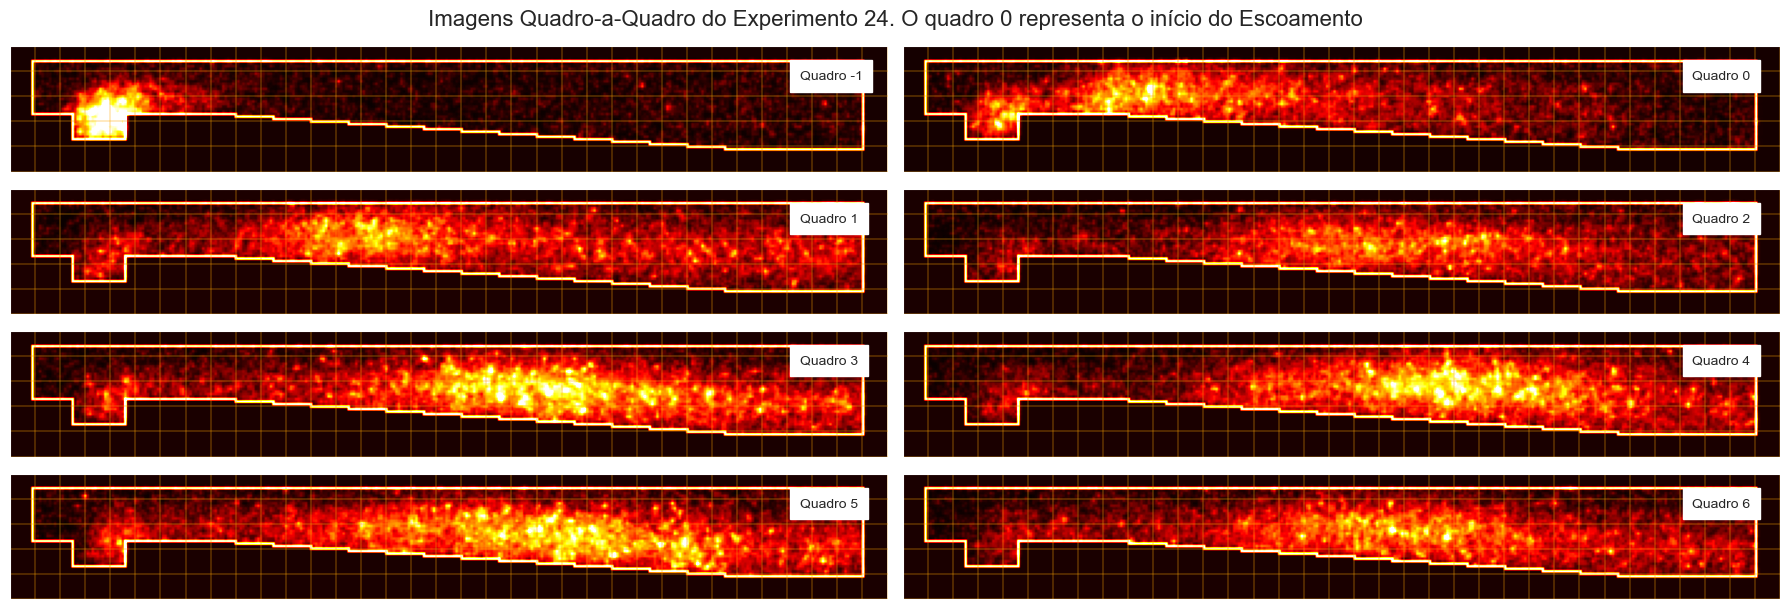

In [21]:
%matplotlib inline
plt.close('all')
plt.figure(figsize=(18,12))

x = 24 #Numero de Experimento de Interesse

Vmax = 0.
for i,quadro in enumerate(quadros):
    nome = './Exp/Exp' + str(x) + '/Exp_0'+str(quadro)+'.tif'
    I = np.array(Image.open(nome))
    I = ndimage.gaussian_filter(I, 5) 
    if I.max() > Vmax:
        Vmax = I.max()
        
plt.suptitle(f'Imagens Quadro-a-Quadro do Experimento {x}. O quadro 0 representa o início do Escoamento',fontsize=16)

for i,quadro in enumerate(quadros):
    plt.subplot(len(quadros),2,i+1)

    plt.text(315, 37, f'Quadro {quadro-n_imagens }', bbox={'facecolor': 'white', 'pad': 7})
    
    nome = './Exp/Exp' + str(x) + '/Exp_0'+str(quadro)+'.tif'
    I = np.array(Image.open(nome))
    I = (Mask*(I-I[500:,:].mean()))[xp[0]-10:xp[1]+10,yp[0]-10:yp[1]+10]

    I_contorno = ndimage.gaussian_filter(I, 5)
    #plt.contour(I_contorno,levels=5,alpha=0.7)

    I_bordas = (Bordas*Vmax)[xp[0]-10:xp[1]+10,yp[0]-10:yp[1]+10] 
    I_emiss = ndimage.gaussian_filter(I, 0.6) 
    plt.imshow( I_emiss + I_bordas , cmap="hot", vmax=Vmax,origin='lower' )
    
    plt.xticks(np.arange(0,431,10),[])
    plt.yticks(np.arange(0,101,10),[])

    plt.grid(False)
    plt.grid(True,lw=0.35,ls='-',color='orange')

    #plt.xlabel(f'Direção x, mm')
    #plt.ylabel(f'Direção y, mm')

    plt.xlim( 0, np.floor( (yp[1]-yp[0]+20)/10 ) *10  )
    plt.ylim( 0, np.floor( (xp[1]-xp[0]+20)/10 ) *10  )

    
    
plt.tight_layout()
plt.subplots_adjust(top=0.95)

#Para salvar a figura, descomente o comando abaixo:    
plt.savefig('Mapa_gray.png',dpi=300, bbox_inches='tight')